In [1]:
import pandas as pd

df = pd.read_excel('C:\\Users\\Georgios\\Downloads\\clustering\\schemaBasedEmbeddingsAnalysisClean.xlsx')
df

,Dataset,Attribute Name,Embeddings,Similarity Measure,Duplicates Type,Valid Pairs,Domain,Average Characters D1,Average Tokens D1,Coverage D1,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,Name,FastText,Cosine Similarity,Scarce,339387,Restaurants,11,2,0.67,...,0.921348,0.803922,0.65,18,0.795455,0.786517,0.790960,0.95,26,Right
1,Restaurants,Name,FastText,Euclidean Distance,Scarce,339678,Restaurants,11,2,0.67,...,0.887640,0.818653,0.30,18,0.802198,0.820225,0.811111,0.40,6,Right
2,Restaurants,Name,FastText,WMD,Scarce,339678,Restaurants,11,2,0.67,...,0.775281,0.644860,0.95,88,0.305310,0.775281,0.438095,0.95,78,Right
3,Restaurants,Name,Albert,Cosine Similarity,Scarce,268054,Restaurants,11,2,0.67,...,0.775281,0.704082,0.95,140,0.526718,0.775281,0.627273,0.95,67,Right
4,Restaurants,Name,Albert,Euclidean Distance,Scarce,339678,Restaurants,11,2,0.67,...,0.752809,0.779070,0.95,17,0.807229,0.752809,0.779070,0.95,6,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,DBLP-Scholar,Title,Albert,Cosine Similarity,One-sided,153738496,Bibliographic,56,8,1.00,...,0.694974,0.710678,0.95,9589,0.686567,0.697574,0.692027,0.95,2489,Right
66,DBLP-Scholar,Title,Albert,Euclidean Distance,One-sided,154364148,Bibliographic,56,8,1.00,...,0.653813,0.783286,0.15,7597,0.953135,0.652080,0.774376,0.15,1719,Right
67,DBLP-Scholar,Title,Albert,WMD,One-sided,154364148,Bibliographic,56,8,1.00,...,0.639081,0.690382,0.95,7541,0.729743,0.639948,0.681902,0.95,1729,Right
68,Movies,Title,FastText,Cosine Similarity,Balanced,378388014,Movies,18,3,1.00,...,0.463106,0.604407,0.60,35312,0.751234,0.485807,0.590045,0.65,8842,Right


In [2]:
df['Dataset'].value_counts()

DBLP-ACM                  12
IMDB-TVDB                 12
TMDB-TVDB                 12
IMDB-TMDB                 12
Restaurants                8
DBLP-Scholar               6
Walmart-Amazon             2
Abt-Buy                    2
Movies                     2
Amazon-Google Products     2
Name: Dataset, dtype: int64

In [3]:
df.groupby(['Dataset'])['Valid Pairs'].mean()

Dataset
Abt-Buy                   1.157776e+06
Amazon-Google Products    4.113694e+06
DBLP-ACM                  5.993118e+06
DBLP-Scholar              1.542562e+08
IMDB-TMDB                 8.222128e+06
IMDB-TVDB                 1.230646e+07
Movies                    3.785098e+08
Restaurants               2.639868e+05
TMDB-TVDB                 3.643898e+06
Walmart-Amazon            3.769986e+07
Name: Valid Pairs, dtype: float64

In [4]:
fMeasures = pd.DataFrame()
for column in df:
    if (0 < column.find('F-Measure')):
            fMeasures[column] = df[column]

In [5]:
precision = pd.DataFrame()
for column in df:
    if (0 < column.find('Precision')):
            precision[column] = df[column]

In [6]:
recall = pd.DataFrame()
for column in df:
    if (0 < column.find('Recall')):
            recall[column] = df[column]

In [7]:
methods = ['CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

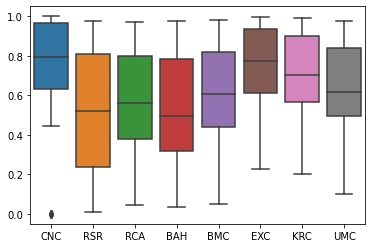

In [8]:
import seaborn as sns

precision.columns = methods
sns.boxplot(data = precision);

In [9]:
precision.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,0.707,0.511,0.559,0.508,0.610,0.739,0.701,0.641
std,0.324,0.315,0.263,0.275,0.253,0.200,0.208,0.232
min,0.000,0.009,0.044,0.037,0.051,0.229,0.203,0.101
25%,0.632,0.237,0.381,0.319,0.438,0.611,0.565,0.497
50%,0.796,0.522,0.559,0.493,0.605,0.775,0.703,0.618
75%,0.965,0.811,0.797,0.783,0.820,0.936,0.902,0.841
max,1.000,0.975,0.970,0.978,0.979,0.997,0.990,0.978


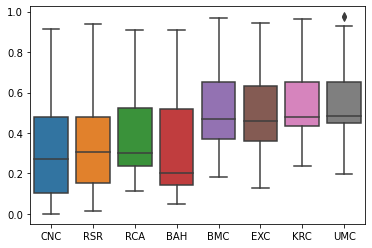

In [10]:
recall.columns = methods
sns.boxplot(data = recall);

In [11]:
recall.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,0.317,0.357,0.394,0.335,0.520,0.501,0.554,0.562
std,0.266,0.252,0.216,0.266,0.203,0.210,0.192,0.186
min,0.000,0.014,0.112,0.048,0.185,0.129,0.235,0.199
25%,0.105,0.151,0.236,0.141,0.369,0.359,0.434,0.448
50%,0.271,0.307,0.302,0.202,0.471,0.460,0.481,0.485
75%,0.477,0.480,0.525,0.518,0.651,0.630,0.653,0.652
max,0.914,0.938,0.909,0.909,0.967,0.942,0.966,0.977


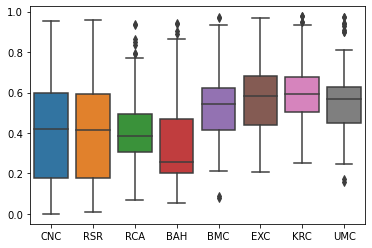

In [12]:
fMeasures.columns = methods
sns.boxplot(data = fMeasures);

In [13]:
fMeasures.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,0.400,0.407,0.434,0.367,0.543,0.578,0.603,0.579
std,0.284,0.266,0.211,0.251,0.207,0.190,0.176,0.187
min,0.000,0.011,0.069,0.053,0.080,0.208,0.250,0.158
25%,0.176,0.177,0.308,0.201,0.413,0.438,0.506,0.449
50%,0.418,0.415,0.387,0.256,0.542,0.582,0.594,0.568
75%,0.598,0.592,0.494,0.471,0.623,0.682,0.679,0.628
max,0.955,0.956,0.939,0.942,0.971,0.968,0.977,0.975


In [14]:
import pingouin  as pg

precision.rcorr()

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
CNC,-,***,***,***,***,***,***,***
RSR,0.703,-,***,***,***,***,***,***
RCA,0.659,0.869,-,***,***,***,***,***
BAH,0.548,0.838,0.858,-,***,***,***,***
BMC,0.637,0.845,0.967,0.814,-,***,***,***
EXC,0.546,0.67,0.817,0.742,0.873,-,***,***
KRC,0.556,0.725,0.881,0.777,0.931,0.984,-,***
UMC,0.614,0.803,0.951,0.801,0.99,0.914,0.962,-


C:\Users\Georgios\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\Georgios\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [15]:
recall.rcorr()

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
CNC,-,***,***,**,***,***,***,***
RSR,0.988,-,***,***,***,***,***,***
RCA,0.515,0.571,-,***,***,***,***,***
BAH,0.335,0.414,0.794,-,***,***,***,***
BMC,0.68,0.725,0.864,0.627,-,***,***,***
EXC,0.694,0.726,0.827,0.547,0.968,-,***,***
KRC,0.591,0.629,0.848,0.633,0.964,0.953,-,***
UMC,0.556,0.608,0.863,0.673,0.965,0.926,0.985,-


In [16]:
fMeasures.rcorr()

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
CNC,-,***,***,***,***,***,***,***
RSR,0.985,-,***,***,***,***,***,***
RCA,0.671,0.69,-,***,***,***,***,***
BAH,0.429,0.502,0.742,-,***,***,***,***
BMC,0.777,0.796,0.891,0.611,-,***,***,***
EXC,0.682,0.704,0.876,0.583,0.949,-,***,***
KRC,0.625,0.658,0.868,0.645,0.947,0.963,-,***
UMC,0.697,0.725,0.888,0.645,0.982,0.95,0.98,-


In [20]:
fMeasures.columns = fMeasureCols
df.groupby(['Dataset'])[fMeasures.columns.tolist()].max().round(3)

,CNC F-Measure,RSR F-Measure,RCA F-Measure,BAH F-Measure,BMC F-Measure,EXC F-Measure,KRC F-Measure,UMC F-Measure
Dataset,,,,,,,,
Abt-Buy,0.187,0.280,0.366,0.559,0.399,0.362,0.466,0.497
Amazon-Google Products,0.326,0.353,0.479,0.474,0.479,0.508,0.546,0.531
DBLP-ACM,0.955,0.956,0.939,0.942,0.971,0.968,0.977,0.975
DBLP-Scholar,0.955,0.956,0.939,0.942,0.971,0.968,0.977,0.975
IMDB-TMDB,0.603,0.607,0.430,0.341,0.624,0.632,0.634,0.628
IMDB-TVDB,0.561,0.563,0.448,0.242,0.590,0.599,0.603,0.592
Movies,0.408,0.433,0.360,0.442,0.514,0.513,0.604,0.590
Restaurants,0.809,0.802,0.789,0.824,0.811,0.814,0.819,0.811
TMDB-TVDB,0.606,0.577,0.460,0.280,0.595,0.626,0.624,0.595


In [21]:
for index, row in df.iterrows():
    maxF1 = 0
    bestMethod = 'N/A'
    allF1s = []
    for method in methods:
        allF1s.append(row[method + ' F-Measure'])
        if (maxF1 < row[method + ' F-Measure']):
            bestMethod = method
            maxF1 = row[method + ' F-Measure']
            
    allF1s.sort()
    secondMax = allF1s[-2]
    df.loc[index, 'Top Method'] = bestMethod
    df.loc[index, 'Diff2Second'] = 1 - (secondMax / maxF1)
df

,Dataset,Attribute Name,Embeddings,Similarity Measure,Duplicates Type,Valid Pairs,Domain,Average Characters D1,Average Tokens D1,Coverage D1,...,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration,Top Method,Diff2Second
0,Restaurants,Name,FastText,Cosine Similarity,Scarce,339387,Restaurants,11,2,0.67,...,0.65,18,0.795,0.787,0.791,0.95,26,Right,EXC,0.012285
1,Restaurants,Name,FastText,Euclidean Distance,Scarce,339678,Restaurants,11,2,0.67,...,0.30,18,0.802,0.820,0.811,0.40,6,Right,BAH,0.006068
2,Restaurants,Name,FastText,WMD,Scarce,339678,Restaurants,11,2,0.67,...,0.95,88,0.305,0.775,0.438,0.95,78,Right,EXC,0.055637
3,Restaurants,Name,Albert,Cosine Similarity,Scarce,268054,Restaurants,11,2,0.67,...,0.95,140,0.527,0.775,0.627,0.95,67,Right,KRC,0.038352
4,Restaurants,Name,Albert,Euclidean Distance,Scarce,339678,Restaurants,11,2,0.67,...,0.95,17,0.807,0.753,0.779,0.95,6,Right,CNC,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,DBLP-Scholar,Authors,FastText,Cosine Similarity,One-sided,154347926,Bibliographic,46,10,1.00,...,0.70,887,0.844,0.777,0.809,0.90,62,Left,UMC,0.003708
69,DBLP-Scholar,Authors,FastText,Euclidean Distance,One-sided,154364148,Bibliographic,46,10,1.00,...,0.25,"2,935",0.817,0.777,0.796,0.45,84,Left,KRC,0.005000
70,DBLP-Scholar,Authors,FastText,WMD,One-sided,154364148,Bibliographic,46,10,1.00,...,0.95,"3,139",0.503,0.519,0.511,0.90,"8,841",Left,KRC,0.101933
71,Movies,Title,FastText,Cosine Similarity,Balanced,378388014,Movies,18,3,1.00,...,0.60,"35,312",0.751,0.486,0.590,0.65,"8,842",Right,KRC,0.023179


In [22]:
df['Top Method'].value_counts()

KRC    44
EXC    15
UMC     6
BAH     3
CNC     3
BMC     2
Name: Top Method, dtype: int64

In [33]:
df.groupby(['Top Method'])['Diff2Second'].mean().round(4)*100

Top Method
BAH    8.65
BMC    0.00
CNC    0.00
EXC    2.04
KRC    4.40
UMC    1.35
Name: Diff2Second, dtype: float64

In [24]:
df.groupby(['Dataset'])['Top Method'].value_counts()

Dataset                 Top Method
Abt-Buy                 BAH           2
Amazon-Google Products  KRC           2
DBLP-ACM                KRC           9
                        UMC           3
DBLP-Scholar            KRC           5
                        EXC           3
                        UMC           1
IMDB-TMDB               KRC           9
                        CNC           2
                        BMC           1
IMDB-TVDB               KRC           9
                        UMC           2
                        EXC           1
Movies                  KRC           2
Restaurants             EXC           5
                        BAH           1
                        CNC           1
                        KRC           1
TMDB-TVDB               KRC           6
                        EXC           5
                        BMC           1
Walmart-Amazon          EXC           1
                        KRC           1
Name: Top Method, dtype: int64

In [25]:
df.groupby(['Similarity Measure'])['Top Method'].value_counts()

Similarity Measure  Top Method
Cosine Similarity   KRC           16
                    EXC            5
                    UMC            3
                    BAH            1
                    BMC            1
Euclidean Distance  KRC           11
                    EXC            7
                    CNC            3
                    BAH            2
                    UMC            2
                    BMC            1
WMD                 KRC           17
                    EXC            3
                    UMC            1
Name: Top Method, dtype: int64

In [26]:
df.groupby(['Duplicates Type'])['Top Method'].value_counts()

Duplicates Type  Top Method
Balanced         KRC           11
                 UMC            3
                 BAH            2
One-sided        KRC            7
                 EXC            3
                 UMC            1
Scarce           KRC           26
                 EXC           12
                 CNC            3
                 BMC            2
                 UMC            2
                 BAH            1
Name: Top Method, dtype: int64

In [27]:
df['Duplicates Type'].value_counts()

Scarce       46
Balanced     16
One-sided    11
Name: Duplicates Type, dtype: int64

In [28]:
df.groupby(['Duplicates Type', 'Top Method'])['Diff2Second'].mean().round(4)*100

Duplicates Type  Top Method
Balanced         BAH           12.68
                 KRC            2.92
                 UMC            2.04
One-sided        EXC            1.02
                 KRC            3.11
                 UMC            0.37
Scarce           BAH            0.61
                 BMC            0.00
                 CNC            0.00
                 EXC            2.29
                 KRC            5.37
                 UMC            0.80
Name: Diff2Second, dtype: float64

In [29]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df['UMC F-Measure'], df['UMC Threshold'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.156


In [30]:
df.groupby(['Embeddings'])['Top Method'].value_counts()

Embeddings  Top Method
Albert      KRC           19
            EXC            5
            UMC            3
            CNC            2
            BMC            1
FastText    KRC           25
            EXC           10
            BAH            3
            UMC            3
            BMC            1
            CNC            1
Name: Top Method, dtype: int64

In [31]:
df['Domain'].value_counts()

Movies           38
Bibliographic    21
Restaurants       8
E-commerce        6
Name: Domain, dtype: int64

In [32]:
df.groupby(['Domain'])['Top Method'].value_counts()

Domain         Top Method
Bibliographic  KRC           14
               UMC            4
               EXC            3
E-commerce     KRC            3
               BAH            2
               EXC            1
Movies         KRC           26
               EXC            6
               BMC            2
               CNC            2
               UMC            2
Restaurants    EXC            5
               BAH            1
               CNC            1
               KRC            1
Name: Top Method, dtype: int64